In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# I assign the daytime values to the variable temperaturas
temperaturas = pd.read_excel('Trabajo_navidades_The_Bridge.xlsx', sheet_name=0, engine='openpyxl')

# I set the 'LATITUD' column as index
temperaturas = temperaturas.set_index('LATITUD')

# I assign the nighttime values to the variable temperaturas_noche
temperaturas_noche = pd.read_excel('Trabajo_navidades_The_Bridge.xlsx', sheet_name=1, engine='openpyxl')

# I set the 'LATITUD' column as index
temperaturas_noche = temperaturas_noche.set_index('LATITUD')

In [3]:
# I import the module mining_data_tb as mdt
from utils import mining_data_tb as mdt

ModuleNotFoundError: No module named 'utils'

In [3]:
temperaturas

,200002,200003,200004,200005,200006,200007,200008,200009,200010,200011,...,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912
LATITUD,,,,,,,,,,,,,,,,,,,,,
89.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-89.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-89.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-89.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# I add the statistics to study and clean the non representative data
temperaturas = mdt.estadisticos(dataset=temperaturas)
temperaturas_noche = mdt.estadisticos(dataset=temperaturas_noche)

In [4]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 18))
    lons = m.drawmeridians(np.linspace(-180, 180, 18))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

In [5]:
lat = temperaturas.index
lon = np.arange(-180,179.8,0.2)
lon, lat = np.meshgrid(lon, lat)

In [10]:
medias = []
for i in range(1799):
    medias.append(temperaturas['mean'])

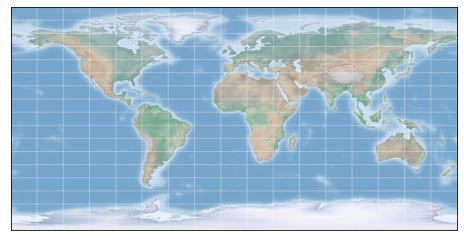

In [6]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None, llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180)
draw_map(m)

In [12]:
enero_dia = mdt.meses_pd(temperaturas, '01')

In [ ]:
enero_dia

In [2]:
# Meses dia

eneros_dia = temperaturas.loc[:,[200101, 200201, 200301,200401,200501,200601,200701,200801,200901,201001,201101,201201,201301,201401,201501,201601,201701,201801,201901]]

febreros_dia = temperaturas.loc[:,[200102, 200202, 200302,200402,200502,200602,200702,200802,200902,201002,201102,201202,201302,201402,201502,201602,201702,201802,201902]]

marzos_dia = temperaturas.loc[:,[200103, 200203, 200303,200403,200503,200603,200703,200803,200903,201003,201103,201203,201303,201403,201503,201603,201703,201803,201903]]

abriles_dia = temperaturas.loc[:,[200104, 200204, 200304,200404,200504,200604,200704,200804,200904,201004,201104,201204,201304,201404,201504,201604,201704,201804,201904]]

mayos_dia = temperaturas.loc[:,[200105, 200205, 200305,200405,200505,200605,200705,200805,200905,201005,201105,201205,201305,201405,201505,201605,201705,201805,201905]]

junios_dia = temperaturas.loc[:,[200106, 200206, 200306,200406,200506,200606,200706,200806,200906,201006,201106,201206,201306,201406,201506,201606,201706,201806,201906]]

julios_dia = temperaturas.loc[:,[200107, 200207, 200307,200407,200507,200607,200707,200807,200907,201007,201107,201207,201307,201407,201507,201607,201707,201807,201907]]

agostos_dia = temperaturas.loc[:,[200108, 200208, 200308,200408,200508,200608,200708,200808,200908,201008,201108,201208,201308,201408,201508,201608,201708,201808,201908]]

septiembres_dia = temperaturas.loc[:,[200109, 200209, 200309,200409,200509,200609,200709,200809,200909,201009,201109,201209,201309,201409,201509,201609,201709,201809,201909]]

octubres_dia = temperaturas.loc[:,[200110, 200210, 200310,200410,200510,200610,200710,200810,200910,201010,201110,201210,201310,201410,201510,201610,201710,201810,201910]]

noviembres_dia = temperaturas.loc[:,[200111, 200211, 200311,200411,200511,200611,200711,200811,200911,201011,201111,201211,201311,201411,201511,201611,201711,201811,201911]]

diciembres_dia = temperaturas.loc[:,[200112, 200212, 200312,200412,200512,200612,200712,200812,200912,201012,201112,201212,201312,201412,201512,201612,201712,201812,201912]]

NameError: name 'temperaturas' is not defined

In [ ]:
# Meses noche

eneros_noche = temperaturas_noche.loc[:,[200101, 200201, 200301,200401,200501,200601,200701,200801,200901,201001,201101,201201,201301,201401,201501,201601,201701,201801,201901]]

febreros_noche = temperaturas_noche.loc[:,[200102, 200202, 200302,200402,200502,200602,200702,200802,200902,201002,201102,201202,201302,201402,201502,201602,201702,201802,201902]]

marzos_noche = temperaturas_noche.loc[:,[200103, 200203, 200303,200403,200503,200603,200703,200803,200903,201003,201103,201203,201303,201403,201503,201603,201703,201803,201903]]

abriles_noche = temperaturas_noche.loc[:,[200104, 200204, 200304,200404,200504,200604,200704,200804,200904,201004,201104,201204,201304,201404,201504,201604,201704,201804,201904]]

mayos_noche = temperaturas_noche.loc[:,[200105, 200205, 200305,200405,200505,200605,200705,200805,200905,201005,201105,201205,201305,201405,201505,201605,201705,201805,201905]]

junios_noche = temperaturas_noche.loc[:,[200106, 200206, 200306,200406,200506,200606,200706,200806,200906,201006,201106,201206,201306,201406,201506,201606,201706,201806,201906]]

julios_noche = temperaturas_noche.loc[:,[200107, 200207, 200307,200407,200507,200607,200707,200807,200907,201007,201107,201207,201307,201407,201507,201607,201707,201807,201907]]

agostos_noche = temperaturas_noche.loc[:,[200108, 200208, 200308,200408,200508,200608,200708,200808,200908,201008,201108,201208,201308,201408,201508,201608,201708,201808,201908]]

septiembres_noche = temperaturas_noche.loc[:,[200109, 200209, 200309,200409,200509,200609,200709,200809,200909,201009,201109,201209,201309,201409,201509,201609,201709,201809,201909]]

octubres_noche = temperaturas_noche.loc[:,[200110, 200210, 200310,200410,200510,200610,200710,200810,200910,201010,201110,201210,201310,201410,201510,201610,201710,201810,201910]]

noviembres_noche = temperaturas_noche.loc[:,[200111, 200211, 200311,200411,200511,200611,200711,200811,200911,201011,201111,201211,201311,201411,201511,201611,201711,201811,201911]]

diciembres_noche = temperaturas_noche.loc[:,[200112, 200212, 200312,200412,200512,200612,200712,200812,200912,201012,201112,201212,201312,201412,201512,201612,201712,201812,201912]]

In [ ]:
mdt.means